In [2]:
import sys

import matplotlib.pyplot as plt

sys.path.append('..')
from src.analysis.model_performances import *
from src.questions_construction.questions import *
import pandas as pd
EVERYTHING_POSTFIX = 'everything'
from helpers import *

In [55]:
TO_PRETTY = {
    (WITHOUT_RANDOM_SUB, WITHOUT_RAMIFICATIONS): 'Baseline', 
    (WITHOUT_RANDOM_SUB, WITH_RAMIFICATIONS): 'Baseline + R.',
    (WITH_RANDOM_SUB, WITHOUT_RAMIFICATIONS): 'O. Baseline',
    (WITH_RANDOM_SUB, WITH_RAMIFICATIONS): 'O. Baseline + R.',
    
    'object_tracking': 'Object Trk.',
    'fluent_tracking': 'Fluent Trk.',
    'state_tracking': 'State Trk.',
    'action_executability': 'Action Exec.',
    'effects': 'Effects of Ac.',
    'numerical_reasoning': 'Num. Reas.',
    'hallucination': 'Hallucination',
    'composite': 'Composite',
    
    'base_fluents': 'Base Fl',
    'persistent_fluents': 'Base Fl + Cnstr.',
    'derived_fluents': 'Derived Fl',
    'static_fluents': 'Static Fl',
}

In [4]:
questions_dir = f'{DATA_PATH}/questions_m1'
questions_by_id = gather_questions(questions_dir)
# sanity_checks()

ids_file_name = f'dataset_ids.test.pruned' #'small_questions_ids' #
if ids_file_name:
    selected_ids = open_jsonl(f'{DATA_PATH}/{ids_file_name}.jsonl')
    data_all, missing_data = gather_data(questions_by_id, selected_ids=selected_ids)
    save_main_dir = f'{STATISTICS_PATH}.{ids_file_name}'
else:
    data_all, missing_data = gather_data(questions_by_id)
    save_main_dir = STATISTICS_PATH

save_dir = os.path.join(save_main_dir, 'plots', 'by_fluents')
os.makedirs(save_dir, exist_ok=True)

questions gathered


  0%|          | 20/18720 [00:00<01:37, 191.25it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_8
Selected IDs are missing for: gemini, without_random_sub, withou

  0%|          | 44/18720 [00:00<01:25, 217.81it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, depots, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, depots, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, depots, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, depots, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, depots, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, depots, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driv

  0%|          | 66/18720 [00:00<01:27, 212.91it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications

  0%|          | 88/18720 [00:00<01:29, 208.19it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_4


  1%|          | 114/18720 [00:00<01:22, 225.51it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few

  1%|          | 142/18720 [00:00<01:18, 238.00it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, my

  1%|          | 168/18720 [00:00<01:16, 243.19it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, np

  1%|          | 193/18720 [00:00<01:19, 232.04it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_sh

  1%|          | 217/18720 [00:00<01:23, 221.77it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_

  1%|▏         | 242/18720 [00:01<01:21, 226.61it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramificat

  1%|▏         | 265/18720 [00:01<02:00, 152.98it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_9
Selected IDs are missing for: gemini, without_random_sub, withou

  2%|▏         | 284/18720 [00:02<05:15, 58.46it/s] 

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_7


  2%|▏         | 298/18720 [00:02<07:08, 42.98it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, depots, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_3


  2%|▏         | 309/18720 [00:03<08:32, 35.95it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_7


  2%|▏         | 317/18720 [00:03<10:01, 30.62it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_10


  2%|▏         | 323/18720 [00:04<11:16, 27.21it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_3


  2%|▏         | 328/18720 [00:04<13:39, 22.44it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_5


  2%|▏         | 332/18720 [00:04<14:47, 20.73it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_6


  2%|▏         | 335/18720 [00:05<14:48, 20.68it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_8


  2%|▏         | 338/18720 [00:05<17:36, 17.40it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_9


  2%|▏         | 341/18720 [00:05<17:06, 17.91it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_10


  2%|▏         | 344/18720 [00:05<17:34, 17.42it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_2


  2%|▏         | 346/18720 [00:05<17:14, 17.76it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_3


  2%|▏         | 350/18720 [00:06<16:02, 19.09it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_5


  2%|▏         | 358/18720 [00:06<15:08, 20.22it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_9


  2%|▏         | 365/18720 [00:06<13:43, 22.29it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_1
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_2


  2%|▏         | 368/18720 [00:06<15:02, 20.34it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_5


  2%|▏         | 375/18720 [00:07<13:13, 23.11it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_8


  2%|▏         | 382/18720 [00:07<14:50, 20.58it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_1


  2%|▏         | 385/18720 [00:07<14:07, 21.65it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_3


  2%|▏         | 390/18720 [00:07<17:09, 17.80it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_5


  2%|▏         | 396/18720 [00:08<18:00, 16.96it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_8


  2%|▏         | 400/18720 [00:08<18:42, 16.32it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_9
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_10


  2%|▏         | 404/18720 [00:08<21:16, 14.34it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_1


  2%|▏         | 410/18720 [00:09<17:48, 17.13it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_5


  2%|▏         | 418/18720 [00:09<14:41, 20.77it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_9


  2%|▏         | 422/18720 [00:09<14:25, 21.15it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_1


  2%|▏         | 428/18720 [00:10<15:02, 20.27it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_3
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_4


  2%|▏         | 432/18720 [00:10<15:18, 19.90it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_5
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_6


  2%|▏         | 435/18720 [00:10<14:08, 21.55it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_7
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_8


  2%|▏         | 441/18720 [00:10<15:05, 20.19it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_1


  2%|▏         | 446/18720 [00:11<19:30, 15.61it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_3


  2%|▏         | 450/18720 [00:11<20:01, 15.21it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_5


  2%|▏         | 454/18720 [00:11<19:40, 15.48it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_7


  2%|▏         | 458/18720 [00:11<21:31, 14.14it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_8


  2%|▏         | 462/18720 [00:12<19:40, 15.47it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_1


  2%|▏         | 466/18720 [00:12<18:55, 16.08it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_3


  3%|▎         | 470/18720 [00:12<18:01, 16.87it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_4


  3%|▎         | 474/18720 [00:12<17:44, 17.14it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_7


  3%|▎         | 478/18720 [00:13<17:16, 17.60it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_9


  3%|▎         | 482/18720 [00:13<17:26, 17.42it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_1


  3%|▎         | 486/18720 [00:13<18:49, 16.15it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_3


  3%|▎         | 490/18720 [00:13<19:57, 15.22it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_5


  3%|▎         | 494/18720 [00:14<20:22, 14.91it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_6
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_7


  3%|▎         | 498/18720 [00:14<19:44, 15.38it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_8
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_9


  3%|▎         | 502/18720 [00:14<20:03, 15.14it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_10
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_1


  3%|▎         | 506/18720 [00:14<20:45, 14.62it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3


  3%|▎         | 510/18720 [00:15<19:37, 15.46it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5


  4%|▍         | 782/18720 [00:15<00:25, 704.18it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_10


  5%|▌         | 1006/18720 [00:35<17:58, 16.42it/s]

Selected IDs are missing for: gemini, without_random_sub, without_ramifications, few_shot_5, visitall, Instance_6


  6%|▌         | 1071/18720 [00:38<08:36, 34.16it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_2
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, withou

  6%|▌         | 1124/18720 [00:38<03:46, 77.74it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_2
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications,

  6%|▋         | 1176/18720 [00:38<02:15, 129.78it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_9
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, miconic, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, 

  7%|▋         | 1232/18720 [00:39<01:38, 177.26it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, 

  7%|▋         | 1283/18720 [00:39<01:23, 207.61it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_9
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_2
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_0,

  7%|▋         | 1332/18720 [00:39<01:23, 209.13it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_2
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, withou

  7%|▋         | 1379/18720 [00:39<01:23, 206.59it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_9
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications

  8%|▊         | 1428/18720 [00:40<01:18, 221.61it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_9
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_s

  8%|▊         | 1484/18720 [00:40<01:10, 243.71it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_9
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, my

  8%|▊         | 1534/18720 [00:40<01:13, 233.83it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_6
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_7
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_2
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_

  8%|▊         | 1558/18720 [00:40<01:14, 230.63it/s]

Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_8
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_9
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_10
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_1
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5
Selected IDs are missing for: gpt-4o, without_random_sub, without_ramificatio

 11%|█         | 2090/18720 [00:40<00:10, 1609.88it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_5
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_6
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_7
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_8
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_9
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_10
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, depots, Instance_1
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, depots, Instance_2
S

 12%|█▏        | 2248/18720 [00:41<00:38, 427.81it/s] 

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_2
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_3
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_4
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_5
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_6
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_7
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_8
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_10
Selected IDs are missin

 13%|█▎        | 2363/18720 [00:42<00:55, 295.05it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_10
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_1
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_2
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_4
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_5
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_6
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_7
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_8
Selected IDs are missing f

 13%|█▎        | 2448/18720 [00:43<00:59, 273.74it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_4
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_5
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_6
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_7
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_8
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_9
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_10
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_1
Selected 

 13%|█▎        | 2514/18720 [00:43<01:01, 264.97it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_8
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_9
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_10
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_1
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_2
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_3
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_4
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_5
Selected IDs are missin

 14%|█▎        | 2567/18720 [00:43<01:04, 250.27it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_8
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_10
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_1
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_2
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_3
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_4
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_6
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_7
Selected IDs are mi

 14%|█▍        | 2610/18720 [00:43<01:06, 241.58it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_9
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_10
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_1
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5
Selected IDs are missing for: llama2-13b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_10


 17%|█▋        | 3156/18720 [00:46<01:16, 203.99it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramificatio

 17%|█▋        | 3202/18720 [00:46<01:17, 200.67it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_

 17%|█▋        | 3250/18720 [00:46<01:11, 217.79it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, l

 18%|█▊        | 3297/18720 [00:47<01:10, 217.92it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, mystery, Ins

 18%|█▊        | 3341/18720 [00:47<01:15, 202.76it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_

 18%|█▊        | 3384/18720 [00:47<01:17, 198.21it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_0, zeno

 18%|█▊        | 3430/18720 [00:47<01:13, 208.97it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramificati

 18%|█▊        | 3451/18720 [00:47<01:15, 201.82it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_

 19%|█▉        | 3514/18720 [00:48<01:14, 202.95it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, l

 19%|█▉        | 3538/18720 [00:48<01:12, 210.00it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, mystery, In

 19%|█▉        | 3581/18720 [00:48<01:16, 197.68it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_6
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1,

 19%|█▉        | 3618/18720 [00:48<01:36, 156.19it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_7
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_8
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_9
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_10
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_1
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, visitall

 20%|█▉        | 3652/18720 [00:49<01:37, 154.33it/s]

Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5
Selected IDs are missing for: llama-3-8b-instruct, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_10


 22%|██▏       | 4190/18720 [00:51<01:12, 200.39it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_8


 23%|██▎       | 4238/18720 [00:52<01:09, 207.80it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_3
Selected IDs ar

 23%|██▎       | 4286/18720 [00:52<01:04, 222.92it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_4
Selected IDs are mi

 23%|██▎       | 4335/18720 [00:52<01:03, 227.65it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_10
Selected IDs are missing for: l

 23%|██▎       | 4380/18720 [00:52<01:08, 209.14it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_2
Selected IDs are mi

 24%|██▎       | 4406/18720 [00:52<01:05, 219.08it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_2
Selected IDs are mi

 24%|██▎       | 4429/18720 [00:53<02:06, 112.63it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_1
Sele

 24%|██▍       | 4446/18720 [00:54<04:09, 57.23it/s] 

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_6


 24%|██▍       | 4459/18720 [00:54<05:22, 44.28it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, depots, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_2


 24%|██▍       | 4469/18720 [00:55<06:35, 36.03it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_6


 24%|██▍       | 4477/18720 [00:55<07:36, 31.19it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_10


 24%|██▍       | 4483/18720 [00:55<08:31, 27.83it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_2


 24%|██▍       | 4488/18720 [00:56<10:03, 23.60it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_4


 24%|██▍       | 4492/18720 [00:56<10:38, 22.28it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_5
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_6


 24%|██▍       | 4495/18720 [00:56<10:31, 22.54it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_8


 24%|██▍       | 4501/18720 [00:57<11:37, 20.39it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_10


 24%|██▍       | 4504/18720 [00:57<11:54, 19.90it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_3


 24%|██▍       | 4512/18720 [00:57<11:00, 21.52it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_5


 24%|██▍       | 4516/18720 [00:57<10:49, 21.86it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_9


 24%|██▍       | 4524/18720 [00:58<10:14, 23.11it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_2


 24%|██▍       | 4528/18720 [00:58<09:46, 24.21it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_5


 24%|██▍       | 4536/18720 [00:58<09:19, 25.37it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_8


 24%|██▍       | 4543/18720 [00:58<09:08, 25.83it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_1


 24%|██▍       | 4546/18720 [00:58<11:05, 21.31it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_3


 24%|██▍       | 4549/18720 [00:59<10:25, 22.65it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_5


 24%|██▍       | 4555/18720 [00:59<11:08, 21.18it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_8


 24%|██▍       | 4561/18720 [00:59<11:33, 20.42it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_9
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_1


 24%|██▍       | 4568/18720 [01:00<11:12, 21.05it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_5


 24%|██▍       | 4576/18720 [01:00<10:05, 23.37it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_9


 24%|██▍       | 4584/18720 [01:00<10:11, 23.11it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_2


 25%|██▍       | 4590/18720 [01:01<11:08, 21.14it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_5


 25%|██▍       | 4594/18720 [01:01<10:58, 21.47it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_7
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_8


 25%|██▍       | 4602/18720 [01:01<11:25, 20.59it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_1


 25%|██▍       | 4605/18720 [01:01<10:39, 22.08it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_3


 25%|██▍       | 4611/18720 [01:02<11:36, 20.24it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_5


 25%|██▍       | 4614/18720 [01:02<13:13, 17.77it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_7


 25%|██▍       | 4618/18720 [01:02<13:16, 17.70it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_8


 25%|██▍       | 4622/18720 [01:02<12:56, 18.16it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_1


 25%|██▍       | 4626/18720 [01:02<12:52, 18.24it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_3


 25%|██▍       | 4630/18720 [01:03<12:37, 18.60it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_4


 25%|██▍       | 4634/18720 [01:03<12:35, 18.65it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_7


 25%|██▍       | 4638/18720 [01:03<12:27, 18.84it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_9


 25%|██▍       | 4642/18720 [01:03<12:24, 18.90it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_1


 25%|██▍       | 4646/18720 [01:04<13:08, 17.85it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_2
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_3


 25%|██▍       | 4650/18720 [01:04<12:44, 18.41it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_5


 25%|██▍       | 4654/18720 [01:04<12:43, 18.42it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_6
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_7


 25%|██▍       | 4658/18720 [01:04<12:51, 18.22it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_8
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_9


 25%|██▍       | 4664/18720 [01:04<12:30, 18.73it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_10
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_1
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2


 25%|██▍       | 4668/18720 [01:05<12:15, 19.11it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5


 25%|██▌       | 4682/18720 [01:05<11:17, 20.73it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_10


 26%|██▋       | 4914/18720 [01:18<16:06, 14.29it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_3, visitall, Instance_6


 28%|██▊       | 5172/18720 [01:36<19:09, 11.78it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, without_ramifications, few_shot_5, visitall, Instance_6


 28%|██▊       | 5252/18720 [01:39<01:56, 115.95it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, blocksworld, Instance_8
Selected IDs are missing for: gemma-7b, without_

 28%|██▊       | 5296/18720 [01:39<01:23, 161.56it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, driverlog, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, goldminer, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, wit

 29%|██▊       | 5348/18720 [01:39<01:05, 204.99it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, grippers, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, logistics, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, witho

 29%|██▊       | 5373/18720 [01:39<01:01, 216.57it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, mystery, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, npuzzle, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramificatio

 29%|██▉       | 5418/18720 [01:39<01:05, 201.60it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, satellite, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, spanner, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramif

 29%|██▉       | 5442/18720 [01:39<01:03, 210.08it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, visitall, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_0, zenotravel, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, w

 29%|██▉       | 5464/18720 [01:40<01:33, 141.39it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_8
Selected IDs are missing for: gemma-7b, without_

 29%|██▉       | 5482/18720 [01:40<03:41, 59.75it/s] 

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_6


 29%|██▉       | 5495/18720 [01:41<04:55, 44.71it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_1


 29%|██▉       | 5505/18720 [01:42<06:03, 36.40it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_5


 29%|██▉       | 5513/18720 [01:42<07:04, 31.13it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_7


 29%|██▉       | 5519/18720 [01:42<07:47, 28.21it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_9


 30%|██▉       | 5524/18720 [01:43<08:34, 25.67it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_2


 30%|██▉       | 5528/18720 [01:43<09:40, 22.72it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_4


 30%|██▉       | 5532/18720 [01:43<10:29, 20.96it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_5
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_6


 30%|██▉       | 5535/18720 [01:43<10:35, 20.74it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_8


 30%|██▉       | 5540/18720 [01:44<12:45, 17.22it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_10


 30%|██▉       | 5544/18720 [01:44<11:52, 18.48it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_3


 30%|██▉       | 5552/18720 [01:44<10:52, 20.17it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_5


 30%|██▉       | 5559/18720 [01:45<09:44, 22.50it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_9


 30%|██▉       | 5562/18720 [01:45<10:53, 20.14it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_1
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_2


 30%|██▉       | 5570/18720 [01:45<10:31, 20.83it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_5


 30%|██▉       | 5574/18720 [01:45<10:24, 21.04it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_8


 30%|██▉       | 5578/18720 [01:45<10:10, 21.54it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_9
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_10


 30%|██▉       | 5582/18720 [01:46<12:02, 18.18it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_1


 30%|██▉       | 5586/18720 [01:46<13:55, 15.73it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_3


 30%|██▉       | 5590/18720 [01:46<13:53, 15.75it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_5


 30%|██▉       | 5596/18720 [01:47<12:48, 17.08it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_8


 30%|██▉       | 5598/18720 [01:47<12:37, 17.33it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_9


 30%|██▉       | 5604/18720 [01:47<12:31, 17.46it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_1


 30%|██▉       | 5608/18720 [01:47<11:23, 19.19it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_3
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_5


 30%|███       | 5616/18720 [01:48<10:08, 21.53it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_9


 30%|███       | 5623/18720 [01:48<08:55, 24.47it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_1


 30%|███       | 5626/18720 [01:48<10:26, 20.91it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_3


 30%|███       | 5629/18720 [01:48<10:01, 21.78it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_5


 30%|███       | 5636/18720 [01:49<10:52, 20.06it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_7
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_8


 30%|███       | 5643/18720 [01:49<09:58, 21.84it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_1


 30%|███       | 5646/18720 [01:49<12:02, 18.10it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_3


 30%|███       | 5650/18720 [01:49<12:49, 16.99it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_5


 30%|███       | 5654/18720 [01:50<13:33, 16.06it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_7


 30%|███       | 5658/18720 [01:50<13:24, 16.25it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_8


 30%|███       | 5662/18720 [01:50<13:09, 16.54it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_1


 30%|███       | 5666/18720 [01:50<12:48, 16.98it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_3


 30%|███       | 5670/18720 [01:51<13:02, 16.67it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_4


 30%|███       | 5674/18720 [01:51<13:29, 16.13it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_6
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_7


 30%|███       | 5678/18720 [01:51<12:48, 16.98it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_9


 30%|███       | 5682/18720 [01:51<14:40, 14.81it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_1


 30%|███       | 5686/18720 [01:52<14:47, 14.69it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_3


 30%|███       | 5690/18720 [01:52<13:40, 15.88it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_5


 30%|███       | 5692/18720 [01:52<14:11, 15.30it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_6


 30%|███       | 5694/18720 [01:52<17:20, 12.51it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_7


 30%|███       | 5698/18720 [01:53<17:30, 12.40it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_8
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_9


 30%|███       | 5702/18720 [01:53<15:31, 13.98it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_10
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_1


 30%|███       | 5706/18720 [01:53<14:06, 15.37it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3


 31%|███       | 5710/18720 [01:53<12:54, 16.81it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5


 31%|███       | 5742/18720 [01:54<03:08, 68.84it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_10


 35%|███▍      | 6500/18720 [01:57<00:45, 266.60it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_1
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_3
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_5
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, blocksworld, Instance_8
Selected IDs are missing for: gemma-2b, without_

 35%|███▍      | 6527/18720 [01:59<03:08, 64.72it/s] 

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_5
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_8
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_9
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, depots, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_1


 35%|███▍      | 6547/18720 [02:00<04:50, 41.86it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_3
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_5
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_8
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, driverlog, Instance_9
Selected IDs are missing for: gemma-2b, without_random_sub, with

 35%|███▌      | 6562/18720 [02:00<06:11, 32.75it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_1
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_3
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_4


 35%|███▌      | 6573/18720 [02:01<07:22, 27.48it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_5
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_8


 35%|███▌      | 6581/18720 [02:02<08:21, 24.22it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_9
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, goldminer, Instance_10


 35%|███▌      | 6587/18720 [02:02<08:35, 23.54it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_1
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_3


 35%|███▌      | 6592/18720 [02:02<08:50, 22.86it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_5


 35%|███▌      | 6596/18720 [02:02<08:46, 23.02it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_8
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_9


 35%|███▌      | 6604/18720 [02:03<08:34, 23.53it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, grippers, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_1
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_2


 35%|███▌      | 6608/18720 [02:03<08:41, 23.24it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_3
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_5


 35%|███▌      | 6616/18720 [02:03<08:17, 24.34it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_8


 35%|███▌      | 6620/18720 [02:03<08:13, 24.51it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_9
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, logistics, Instance_10


 35%|███▌      | 6623/18720 [02:04<08:20, 24.18it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_1
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_2


 35%|███▌      | 6629/18720 [02:04<09:17, 21.68it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_3
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_4


 35%|███▌      | 6632/18720 [02:04<10:45, 18.74it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_5


 35%|███▌      | 6635/18720 [02:04<09:48, 20.53it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_8


 35%|███▌      | 6640/18720 [02:05<11:11, 17.98it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_9
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, miconic, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_1


 36%|███▌      | 6648/18720 [02:05<09:22, 21.47it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_3
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_5


 36%|███▌      | 6656/18720 [02:05<08:38, 23.27it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_8
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_9


 36%|███▌      | 6664/18720 [02:06<08:53, 22.59it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, mystery, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_1


 36%|███▌      | 6667/18720 [02:06<08:27, 23.76it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_3


 36%|███▌      | 6673/18720 [02:06<08:52, 22.62it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_5
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_6


 36%|███▌      | 6676/18720 [02:06<09:58, 20.12it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_7
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_8


 36%|███▌      | 6683/18720 [02:06<09:13, 21.76it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, npuzzle, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_1


 36%|███▌      | 6686/18720 [02:07<10:44, 18.67it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_3


 36%|███▌      | 6689/18720 [02:07<09:55, 20.19it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_5


 36%|███▌      | 6694/18720 [02:07<11:16, 17.77it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_7


 36%|███▌      | 6698/18720 [02:07<11:24, 17.57it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_8


 36%|███▌      | 6702/18720 [02:08<11:06, 18.03it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, satellite, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_1


 36%|███▌      | 6706/18720 [02:08<10:43, 18.67it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_3


 36%|███▌      | 6710/18720 [02:08<10:44, 18.63it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_4


 36%|███▌      | 6713/18720 [02:08<09:12, 21.73it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_7


 36%|███▌      | 6718/18720 [02:08<10:47, 18.55it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_8
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_9


 36%|███▌      | 6722/18720 [02:09<10:39, 18.76it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, spanner, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_1


 36%|███▌      | 6726/18720 [02:09<10:44, 18.62it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_3


 36%|███▌      | 6730/18720 [02:09<10:30, 19.01it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_5


 36%|███▌      | 6734/18720 [02:09<10:37, 18.80it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_6
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_7


 36%|███▌      | 6737/18720 [02:09<09:06, 21.93it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_8
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_9


 36%|███▌      | 6742/18720 [02:10<11:05, 18.01it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, visitall, Instance_10
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_1


 36%|███▌      | 6746/18720 [02:10<11:24, 17.49it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_2
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_3


 36%|███▌      | 6750/18720 [02:10<11:15, 17.72it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_4
Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_5


 36%|███▌      | 6764/18720 [02:11<10:10, 19.58it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_1, zenotravel, Instance_10


 37%|███▋      | 6994/18720 [02:25<14:28, 13.50it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_3, visitall, Instance_6


 39%|███▉      | 7254/18720 [02:43<15:51, 12.05it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, without_ramifications, few_shot_5, visitall, Instance_6


 65%|██████▍   | 12142/18720 [03:37<04:11, 26.19it/s] 

Selected IDs are missing for: llama2-13b-chat, without_random_sub, with_ramifications, few_shot_3, visitall, Instance_6


 67%|██████▋   | 12454/18720 [04:01<08:38, 12.08it/s]

Selected IDs are missing for: llama2-13b-chat, without_random_sub, with_ramifications, few_shot_5, visitall, Instance_6


 76%|███████▋  | 14274/18720 [04:26<05:20, 13.85it/s] 

Selected IDs are missing for: llama2-7b-chat, without_random_sub, with_ramifications, few_shot_3, visitall, Instance_6


 78%|███████▊  | 14534/18720 [04:43<06:17, 11.09it/s]

Selected IDs are missing for: llama2-7b-chat, without_random_sub, with_ramifications, few_shot_5, visitall, Instance_6


 82%|████████▏ | 15314/18720 [05:10<03:55, 14.43it/s] 

Selected IDs are missing for: gemma-7b, without_random_sub, with_ramifications, few_shot_3, visitall, Instance_6


 83%|████████▎ | 15574/18720 [05:27<04:16, 12.27it/s]

Selected IDs are missing for: gemma-7b, without_random_sub, with_ramifications, few_shot_5, visitall, Instance_6


 87%|████████▋ | 16356/18720 [05:54<01:47, 21.97it/s] 

Selected IDs are missing for: gemma-2b, without_random_sub, with_ramifications, few_shot_3, visitall, Instance_6


 89%|████████▊ | 16612/18720 [06:11<05:42,  6.16it/s]

Selected IDs are missing for: gemma-2b, without_random_sub, with_ramifications, few_shot_5, visitall, Instance_6


21082it [06:18, 832.04it/s]                          

Selected IDs are missing for: llama2-13b-chat, with_random_sub, without_ramifications, few_shot_3, blocksworld, Instance_4


37440it [07:05, 87.98it/s]  


data is gathered


In [59]:
model_name = 'gemini'# 'gpt-4o' #'gemma-2b-it' 
prompt_type = 'few_shot_1'
question_category = ALL_QUESTION_CATEGORIES_KEY
ramifications = WITH_RAMIFICATIONS
answer_type = TRUE_FALSE_ANSWER_TYPE

plan_length = 19
domain = ALL_DOMAINS_KEY

categories = list((BASE_FLUENTS, PERSISTENT_FLUENTS, DERIVED_FLUENTS, STATIC_FLUENTS))

score_type = ACCURACY_SCORE_KEY

# By ramifications

In [56]:
# substitutions = WITH_RANDOM_SUB
# domain = ALL_DOMAINS_KEY
# 
# 
# data_for_plot = []
# for ramifications in RAMIFICATION_TYPES:
#     data_for_plot_instance = {NAME_KEY: ramifications, DATA_KEY: [], ERROR_KEY: []}
#     for fluent_type in categories:
#         data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
#         stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
#         data_for_plot_instance[DATA_KEY].append(stats.compute()['result'])
#         data_for_plot_instance[ERROR_KEY].append(stats.compute()['result_other']['sem'])
#     data_for_plot.append(data_for_plot_instance)
#     
# 
# plt_n_bars(categories, data_for_plot)
# plt.ylabel('F1')
# plt.ylim([0.4,1])
# 
# save_name =  f'by_ramifications.{model_name}.{prompt_type}.{domain}.{substitutions}.pl-{plan_length}'
# save_path = os.path.join(save_dir, f'{save_name}.pdf')
# plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
# print(save_name.replace('.',', ').replace('_',' '))

# By question Categories

In [60]:
substitutions = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

by_color = {'object_tracking': '#F6DCAC', 'fluent_tracking': '#005C78', 'effects': '#E88D67'}
data_for_plot = []
for question_category in QUESTION_CATEGORIES:
    data_for_plot_instance = {NAME_KEY: question_category, DATA_KEY: [], ERROR_KEY: [], 'color': []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type}), (OUT_OBJ_QUESTION_CATEGORY, {question_category})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
        data_for_plot_instance['color'].append(by_color.get(question_category, '000000'))
    if data_for_plot_instance[DATA_KEY][0]:
        data_for_plot.append(data_for_plot_instance)

by question category, gemini, few shot 1, ALL DOMAINS, without ramifications, without random sub, pl-19


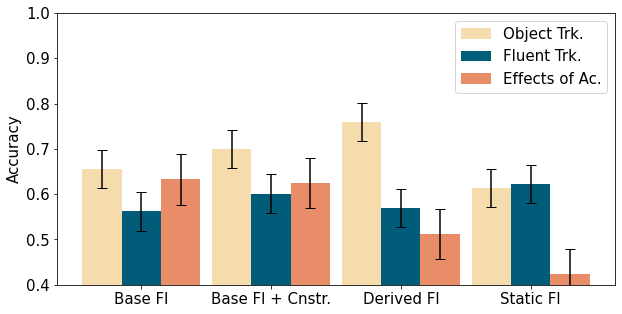

In [62]:
def plt_n_bars(categories, groups):
    plt.figure(figsize=(10, 5))
    bar_width = 0.3

    mult_factor = bar_width * len(groups) * 1.1

    ind = np.arange(len(categories)) * mult_factor  # the x locations for the groups
    num_groups = len(groups)
    total_width = num_groups * bar_width
    offset = total_width / 2 - bar_width / 2  # to center the group of bars

    for i, group in enumerate(groups):
        data = [0 if x is None else x for x in group[DATA_KEY]]
        if ERROR_KEY in group:
            plt.bar(ind + i * bar_width, data, width=bar_width, label=group[NAME_KEY], yerr=group[ERROR_KEY][i], capsize=5, color=group['color'])
        else:
            plt.bar(ind + i * bar_width, data, width=bar_width, label=group[NAME_KEY])

    # Set the x-axis labels in the middle of the groups of bars
    plt.xticks(ind + offset, categories, size=15)
    plt.yticks(size=15)
    # plt.legend()
  
for d in data_for_plot:
    d[NAME_KEY]=TO_PRETTY.get(d[NAME_KEY], d[NAME_KEY])  
plt_n_bars([TO_PRETTY[c] for c in categories], data_for_plot)
plt.ylabel('Accuracy', size=15)
plt.ylim([0.4,1])
plt.legend(fontsize=15) # bbox_to_anchor=(1, 1

save_name =  f'by_question_category.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))


# By Length

In [ ]:
# substitutions = WITHOUT_RANDOM_SUB
# ramifications = WITHOUT_RAMIFICATIONS
# 
# data_for_plot = []
# for plan_length in PLAN_LENGTHS:
#     data_for_plot_instance = {NAME_KEY: plan_length, DATA_KEY: [], ERROR_KEY: []}
#     for fluent_type in categories:
#         data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
#         stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions,score_type=score_type)
#         out_obj = stats.compute()
#         data_for_plot_instance[DATA_KEY].append(out_obj['result'])
#         if out_obj['result']:
#             error = out_obj['result_other']['sem']
#         else:
#             error = 0
#         data_for_plot_instance[ERROR_KEY].append(error)
#     if data_for_plot_instance[DATA_KEY][0]:
#         data_for_plot.append(data_for_plot_instance)
# 
#     
# plt_n_bars(categories, data_for_plot)
# plt.ylabel('Accuracy [%]')
# plt.ylim([0.4,1])
# 
# save_name = f'by_plan_length.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
# save_path = os.path.join(save_dir, f'{save_name}.pdf')
# plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
# print(save_name.replace('.',', ').replace('_',' '))

by plan length, gpt-4o, few shot 1, NON TRANSPORTATION, without ramifications, without random sub, pl-19


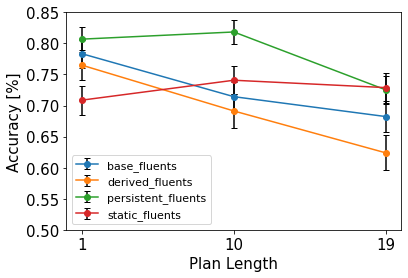

In [28]:
substitutions = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS

plan_lengths = [1, 10, 19]
y_by_fluent = {}
for fluent_type in categories:
    y = []
    y_error = []
    for plan_length in plan_lengths:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions,score_type=score_type)
        out_obj = stats.compute()
        y.append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        y_error.append(error)
    y_by_fluent[domain] = y
    # plt.plot(plan_lengths, y, 'o-', label=fluent_type, yerr=y_error, capsize=5)
    plt.errorbar(plan_lengths, y, yerr=y_error, capsize=3, fmt="o-", label=fluent_type, ecolor = "black")


plt.ylim([0.50, 0.85])
plt.xticks(plan_lengths)
# plt.title(f'{model_name} {prompt_type} {subs} {ramifications}')
plt.legend(fontsize=11) # bbox_to_anchor=(1, 1)
plt.xticks(size=15)
plt.xlabel('Plan Length', size=15)
plt.yticks(size=15)
plt.ylabel('Accuracy [%]', size=15)

save_name = f'by_plan_length.{model_name}.{prompt_type}.{domain}.{ramifications}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By Random Subs

In [ ]:
plan_length = 1 

data_for_plot = []
for substitutions in SUBSTITUTION_TYPES:
    data_for_plot_instance = {NAME_KEY: substitutions, DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('F1')
plt.ylim([0.5,1])

save_name =  f'by_subs.{model_name}.{prompt_type}.{domain}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By Domain Category

by domains, gpt-4o, few shot 1, NON TRANSPORTATION, without random sub, pl-19


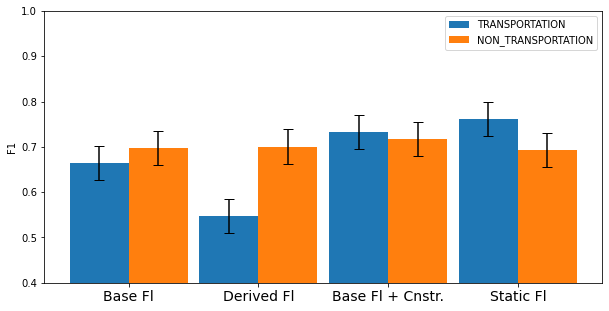

In [27]:
substitutions = WITHOUT_RANDOM_SUB
plan_length = 19


data_for_plot = []
for domain, domain_names in [(TRANSPORTATION_DOMAIN_KEY, TRANSPORTATION_DOMAINS), (NON_TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAINS)]:
    data_for_plot_instance = {NAME_KEY: domain, DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_DOMAIN_NAME, set(domain_names)), (OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars([TO_PRETTY[c] for c in categories], data_for_plot)
plt.ylabel('F1')
plt.ylim([0.4,1])

save_name =  f'by_domains.{model_name}.{prompt_type}.{domain}.{substitutions}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))

# By positive and neg fluents

In [ ]:
# small_dataset_ids.200.2.pl-1.new.jsonl# by_is_pos_fluent_question = {}
# for is_pos_fluent_question in [True, False, None]:
#     data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_IS_POS_FLUENT_QUESTION, {is_pos_fluent_question})])
#     stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions)
#     by_is_pos_fluent_question[is_pos_fluent_question] = stats.compute()['result']

substitutions = WITHOUT_RANDOM_SUB
domain = ALL_DOMAINS_KEY
ramifications = WITHOUT_RAMIFICATIONS
plan_length = 19

to_pretty = {True: 'positive fluents', False: 'negative fluents'}
data_for_plot = []
for is_pos_fluent_question in [True, False]:
    data_for_plot_instance = {NAME_KEY: to_pretty[is_pos_fluent_question], DATA_KEY: [], ERROR_KEY: []}
    for fluent_type in categories:
        data = filter_multi_selector_modified(data_all, ramifications, model_name, prompt_type, answer_type, substitutions, plan_length, [(OUT_OBJ_IS_POS_FLUENT_QUESTION, {is_pos_fluent_question}), (OUT_OBJ_FLUENT_TYPE, {fluent_type})])
        stats = TrueFalseStatsCustom(data, plan_length, question_category, ramifications, model_name, prompt_type, domain, substitutions, score_type=score_type)
        out_obj = stats.compute()
        data_for_plot_instance[DATA_KEY].append(out_obj['result'])
        if out_obj['result']:
            error = out_obj['result_other']['sem']
        else:
            error = 0
        data_for_plot_instance[ERROR_KEY].append(error)
    data_for_plot.append(data_for_plot_instance)
    

plt_n_bars(categories, data_for_plot)
plt.ylabel('Accuracy [%]')
plt.ylim([0.4,1])

save_name =  f'by_pos_neg.{model_name}.{prompt_type}.{domain}.{substitutions}.{ramifications}.pl-{plan_length}'
save_path = os.path.join(save_dir, f'{save_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
print(save_name.replace('.',', ').replace('_',' '))